# BankLoan Dataset:

# Binary Classification of Defaulters and non-Defaulters of Bank Loans using Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('Bankloan.csv')

# Data:

In [3]:
data.head(15)

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0
5,41,2,5,5,25,10.2,0.392700,2.157300,0.0
6,39,1,20,9,67,30.6,3.833874,16.668126,0.0
7,43,1,12,11,38,3.6,0.128592,1.239408,0.0
8,24,1,3,4,19,24.4,1.358348,3.277652,1.0
9,36,1,0,13,25,19.7,2.777700,2.147300,0.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1150 entries, 0 to 1149
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1150 non-null   int64  
 1   ed        1150 non-null   int64  
 2   employ    1150 non-null   int64  
 3   address   1150 non-null   int64  
 4   income    1150 non-null   int64  
 5   debtinc   1150 non-null   float64
 6   creddebt  1150 non-null   float64
 7   othdebt   1150 non-null   float64
 8   default   700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 81.0 KB


# Data Cleaning:

In [5]:
df=data.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 0 to 699
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       700 non-null    int64  
 1   ed        700 non-null    int64  
 2   employ    700 non-null    int64  
 3   address   700 non-null    int64  
 4   income    700 non-null    int64  
 5   debtinc   700 non-null    float64
 6   creddebt  700 non-null    float64
 7   othdebt   700 non-null    float64
 8   default   700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 54.7 KB



# Data summary:

In [6]:
df.describe()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,34.860000,1.722857,8.388571,8.278571,45.601429,10.260571,1.553553,3.058209,0.261429
std,7.997342,0.928206,6.658039,6.824877,36.814226,6.827234,2.117197,3.287555,0.439727
min,20.000000,1.000000,0.000000,0.000000,14.000000,0.400000,0.011696,0.045584,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.000000,0.369059,1.044178,0.000000
50%,34.000000,1.000000,7.000000,7.000000,34.000000,8.600000,0.854869,1.987567,0.000000
75%,40.000000,2.000000,12.000000,12.000000,55.000000,14.125000,1.901955,3.923065,1.000000
max,56.000000,5.000000,31.000000,34.000000,446.000000,41.300000,20.561310,27.033600,1.000000


In [7]:
df=df.drop(['address'],axis=1) #Dropping address column as it's not of highest importance

# Correlation Matrix:

In [8]:
corr=df.corr()
corr

,age,ed,employ,income,debtinc,creddebt,othdebt,default
age,1.000000,0.022325,0.536497,0.478710,0.016398,0.295207,0.340217,-0.137657
ed,0.022325,1.000000,-0.153621,0.235190,0.008838,0.088274,0.165459,0.114676
employ,0.536497,-0.153621,1.000000,0.619681,-0.031182,0.403694,0.406091,-0.282978
income,0.478710,0.235190,0.619681,1.000000,-0.026777,0.570199,0.610659,-0.070970
debtinc,0.016398,0.008838,-0.031182,-0.026777,1.000000,0.501767,0.584870,0.389575
creddebt,0.295207,0.088274,0.403694,0.570199,0.501767,1.000000,0.633104,0.244740
othdebt,0.340217,0.165459,0.406091,0.610659,0.584870,0.633104,1.000000,0.145713
default,-0.137657,0.114676,-0.282978,-0.070970,0.389575,0.244740,0.145713,1.000000


# HEATMAP:

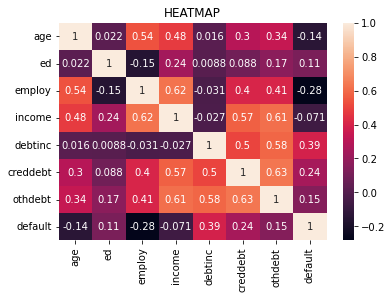

In [9]:
sns.heatmap(corr,annot=True)
plt.title('HEATMAP')
plt.show()

# Scatterplot of Independent and Dependent Variables(default):

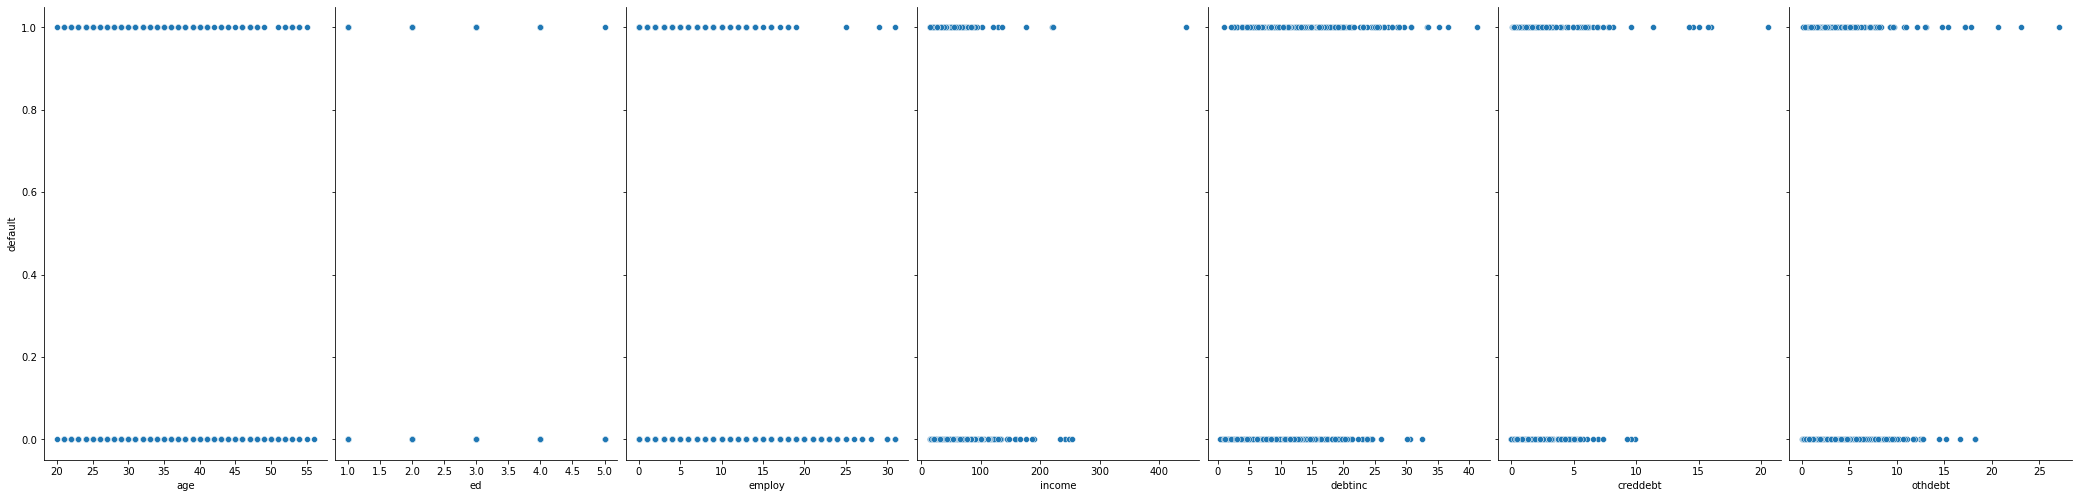

In [10]:
sns.pairplot(df,x_vars=['age','ed','employ','income','debtinc','creddebt','othdebt'],y_vars=['default'],height=7,aspect=0.6,kind='scatter')
plt.ylabel('Default')
plt.show()

# Exploratory Data Analysis:

# CORRELOGRAM:

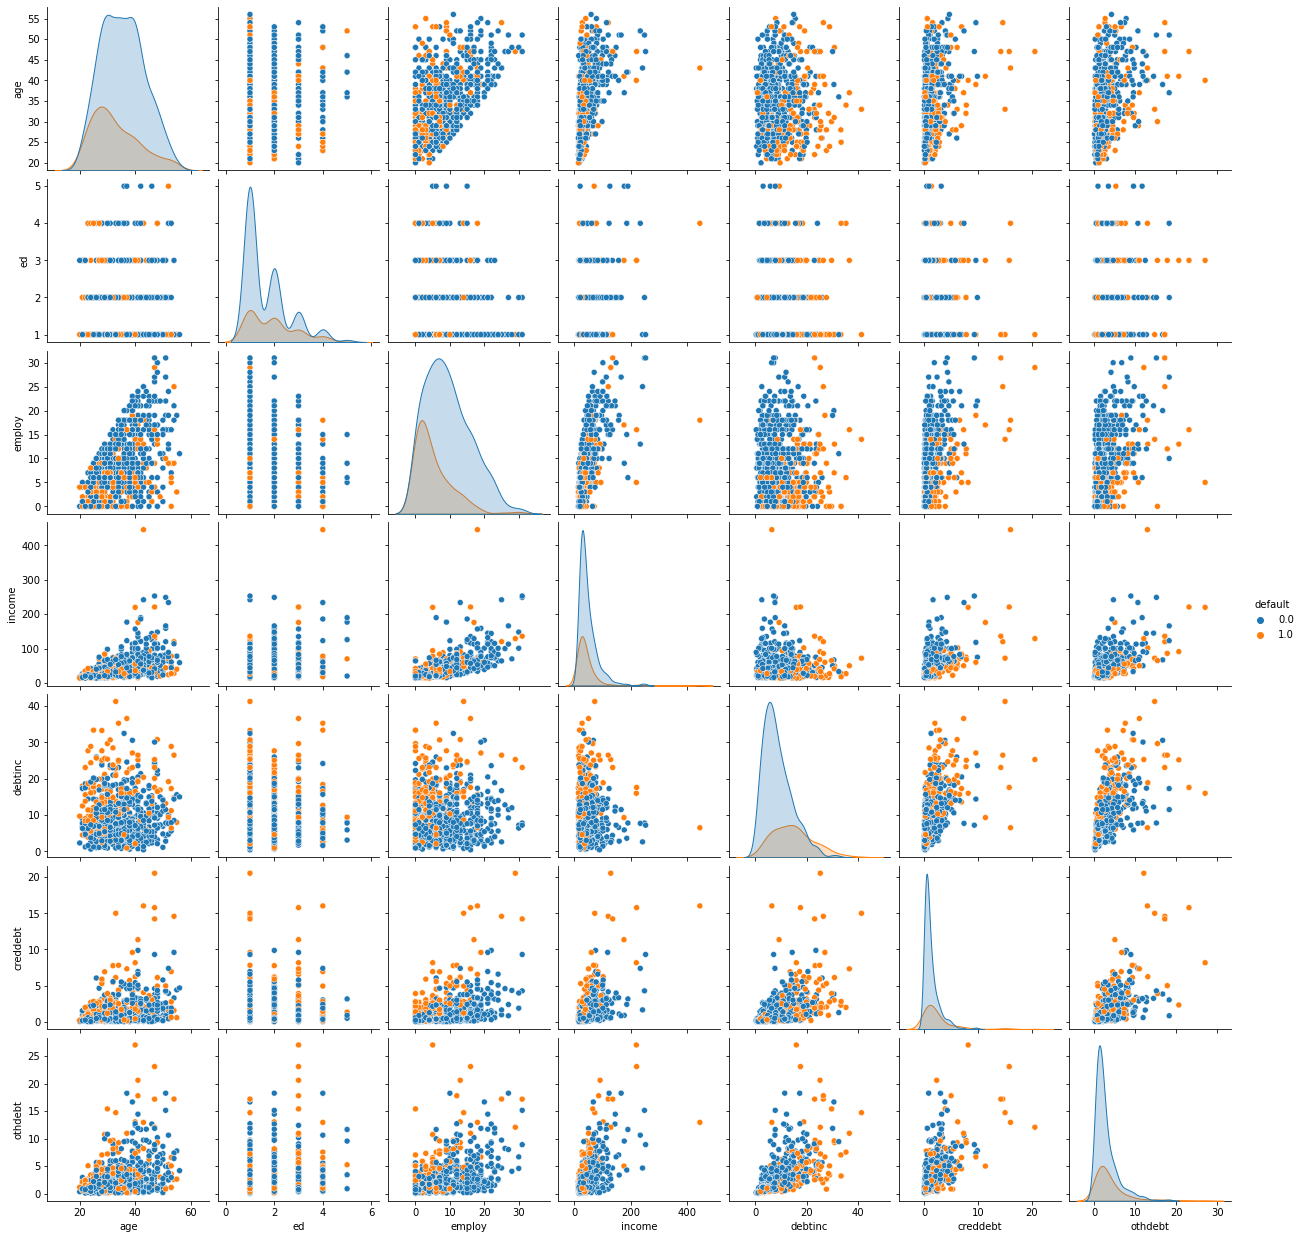

In [11]:
sns.pairplot(df,hue='default',diag_kind = "kde",kind = "scatter")

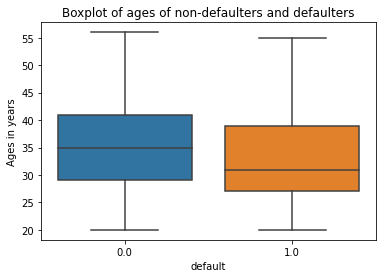

In [12]:
sns.boxplot(x="default", y="age", data=df)
plt.title('Boxplot of ages of non-defaulters and defaulters')
plt.ylabel('Ages in years')
plt.show()

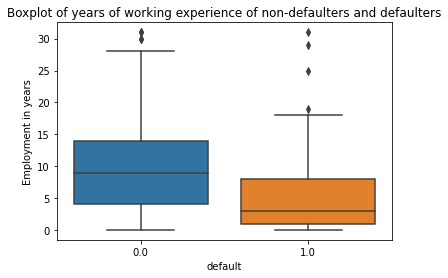

In [13]:
sns.boxplot(x="default", y="employ", data=df)
plt.title('Boxplot of years of working experience of non-defaulters and defaulters')
plt.ylabel('Employment in years')
plt.show()

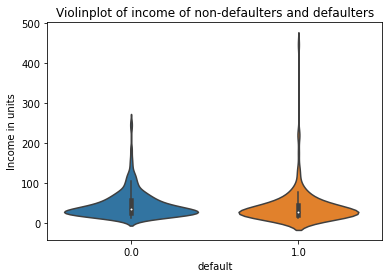

In [14]:
sns.violinplot(x="default", y="income",data=df)
plt.title('Violinplot of income of non-defaulters and defaulters')
plt.ylabel('Income in units')
plt.show()

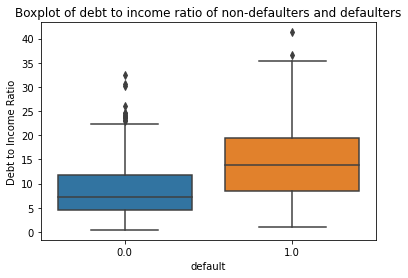

In [15]:
sns.boxplot(x="default", y="debtinc", data=df)
plt.title('Boxplot of debt to income ratio of non-defaulters and defaulters')
plt.ylabel('Debt to Income Ratio')
plt.show()

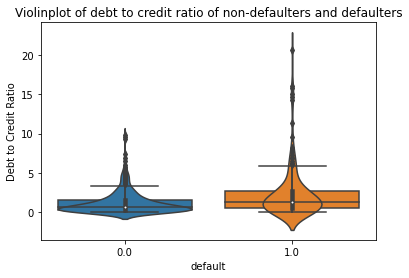

In [16]:
sns.boxplot(x="default", y="creddebt", data=df)
sns.violinplot(x="default", y="creddebt", data=df)
plt.title('Violinplot of debt to credit ratio of non-defaulters and defaulters')
plt.ylabel('Debt to Credit Ratio')
plt.show()

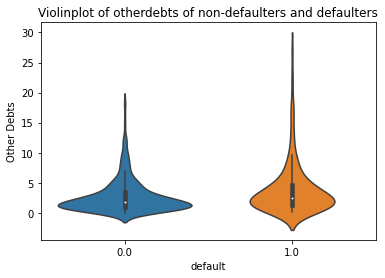

In [17]:
sns.violinplot(x="default", y="othdebt", data=df)
plt.title('Violinplot of otherdebts of non-defaulters and defaulters')
plt.ylabel('Other Debts')
plt.show()

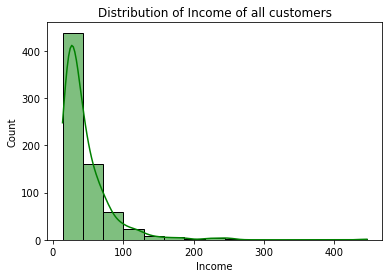

In [18]:
sns.histplot(df['income'],bins=15,color='green',kde='True')
plt.title('Distribution of Income of all customers')
plt.xlabel('Income')
plt.show()

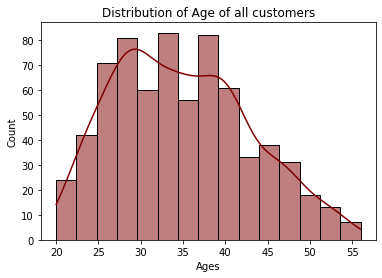

In [19]:
sns.histplot(df['age'],bins=15,color='maroon',kde=True)
plt.title('Distribution of Age of all customers')
plt.xlabel('Ages')
plt.show()

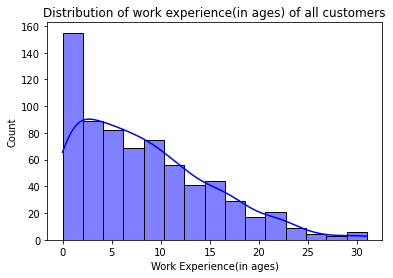

In [20]:
sns.histplot(df['employ'],bins=15,color='blue',kde=True)
plt.title('Distribution of work experience(in ages) of all customers')
plt.xlabel('Work Experience(in ages)')
plt.show()

# Logistic Regression by Training our Model:

In [21]:
#Independent variables:
X=df[['age','ed','employ','income','debtinc','creddebt','othdebt']]
X

,age,ed,employ,income,debtinc,creddebt,othdebt
0,41,3,17,176,9.3,11.359392,5.008608
1,27,1,10,31,17.3,1.362202,4.000798
2,40,1,15,55,5.5,0.856075,2.168925
3,41,1,15,120,2.9,2.658720,0.821280
4,24,2,2,28,17.3,1.787436,3.056564
...,...,...,...,...,...,...,...
695,36,2,6,27,4.6,0.262062,0.979938
696,29,2,6,21,11.5,0.369495,2.045505
697,33,1,15,32,7.6,0.491264,1.940736
698,45,1,19,77,8.4,2.302608,4.165392


In [22]:
#Dependent variables:
y=df['default']
y

0      1.0
1      0.0
2      0.0
3      0.0
4      1.0
      ... 
695    1.0
696    0.0
697    0.0
698    0.0
699    0.0
Name: default, Length: 700, dtype: float64

In [23]:
#Importing train_test_split:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.80,test_size=0.20,random_state=42)
#80% data to be taken as training data and rest for testing to check accuracy

In [24]:
#Importing Logistic Regression from sklearn library:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=1000)

In [25]:
X_train.shape

(560, 7)

In [26]:
y_train.shape

(560,)

In [27]:
X_test.shape

(140, 7)

In [28]:
y_test.shape

(140,)

In [29]:
#Fitting:
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [30]:
#Model Prediction:
model.predict(X_test)

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 0.])

# Model Accuracy:

In [31]:
model.score(X_test,y_test)

0.8714285714285714

# The accuracy of the Logistic Model is 87.14% considering all Independent features in the given dataset

Missing value blessing as we carry on with our predictions for missing values:

In [32]:
Missingdefault=data[700:1150]

In [33]:
Missingdefault_X_test=Missingdefault[['age','ed','employ','income','debtinc','creddebt','othdebt']]

Missing value predictions:

In [34]:
model.predict(Missingdefault_X_test)

array([0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 0.

Standarzidation of Independent Features:

In [35]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[ 0.76830405,  1.37691065,  1.29431297, ..., -0.14079763,
         4.6348313 ,  0.59369176],
       [-0.98352929, -0.77932527,  0.24220057, ...,  1.03181795,
        -0.09044394,  0.28691947],
       [ 0.6431731 , -0.77932527,  0.99370943, ..., -0.69779002,
        -0.3296701 , -0.27069346],
       ...,
       [-0.23274357, -0.77932527,  0.99370943, ..., -0.38997844,
        -0.5021018 , -0.34015304],
       [ 1.26882787, -0.77932527,  1.59491651, ..., -0.27271688,
         0.35404868,  0.33702105],
       [ 0.26778024, -0.77932527,  0.54280411, ...,  0.65071788,
         0.68116556,  0.1263566 ]])

Principal Component Analysis to get the important components:

In [36]:
from sklearn.decomposition import PCA

In [37]:
pca=PCA(0.95)   #Retain 95% of information and variability in data and create a new dimension 
#pca=PCA(n_components=7)

In [38]:
X_pca=pca.fit_transform(X)

In [39]:
X_pca.shape   #Newer Dimension

(700, 3)

In [40]:
data.shape

(1150, 9)

In [41]:
X_pca

array([[130.60117916,   9.24183877,   3.73396662],
       [-15.04197374,   0.68474585,   8.14155896],
       [ 10.51280673,  -2.94596248,  -7.31363856],
       ...,
       [-12.94194209,  -1.2399166 ,  -4.08511944],
       [ 33.33159478,  -7.00214698,  -5.85607946],
       [ -0.8916332 ,  -5.26446004,   2.30557256]])

In [42]:
pca.explained_variance_ratio_

array([0.91314664, 0.03593069, 0.03354868])

In [43]:
pca.n_components_

3

In [44]:
X_train_pca,X_test_pca,y_train,y_test=train_test_split(X_pca,y,test_size=0.2,random_state=30)

In [45]:
model=LogisticRegression(max_iter=1000)
model.fit(X_train_pca,y_train)

LogisticRegression(max_iter=1000)

In [46]:
model.score(X_test_pca,y_test)

0.7642857142857142

# We get a model of 76.42% accuracy from 95% useful information retained so we get our best fitted model from previous LogisticRegression

Text(0, 0.5, 'Second Principal Component')

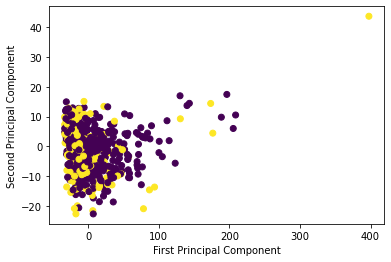

In [47]:
plt.scatter(X_pca[:,0],X_pca[:,1],c=df['default'])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')